# Rough Calculations 

In [1]:
def cc_g_to_mmol_g(cc_g):
    mmol_g = cc_g/22.4;
    return mmol_g

In [2]:
cc_g_to_mmol_g(5)

0.22321428571428573

# Langmuir Isotherm

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
def langmuir_fit (P, ns, b):
    return (ns*b*P)/(1+(b*P))

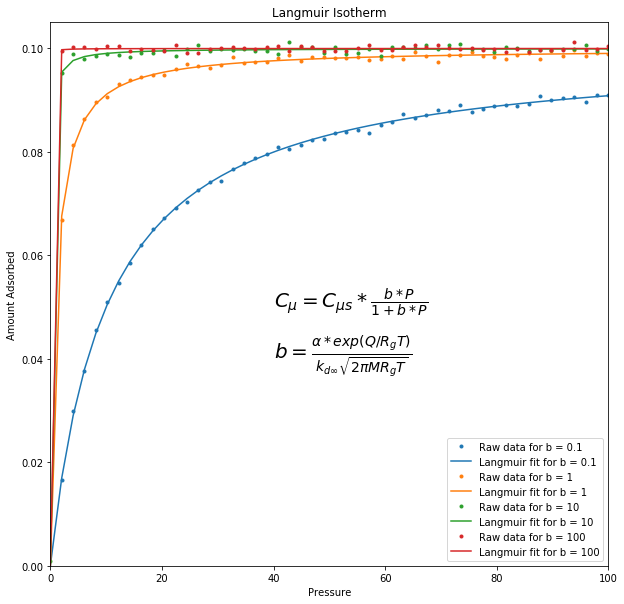

In [64]:
pressure = np.linspace(0, 100, 50)
ns = 0.1
np.random.seed(1729)

langmuir = plt.figure(figsize=(10,10))
for b in [0.1, 1, 10, 100]:
    adsorbed = []*len(pressure)
    ads_calc = langmuir_fit(pressure, ns, b)
    ads_noise = 0.0005 * np.random.normal(size=xdata.size)
    adsorbed = ads_calc + ads_noise
    raw = plt.plot(pressure, adsorbed, '.', 
                   label='Raw data for b = '+str(b))
    raw_color = raw[0].get_color()
    popt, pcov = curve_fit(langmuir_fit, pressure, adsorbed)
    fit = plt.plot(pressure, langmuir_fit(pressure, *popt), color=raw_color,
                   label ='Langmuir fit for b = '+str(b))

plt.title('Langmuir Isotherm')
plt.xlabel('Pressure')
plt.ylabel('Amount Adsorbed')
plt.legend()
plt.axis((0, 100, 0, 0.105))
plt.text(40, 0.05, r'$C_ {\mu} = C _{\mu s} * \frac{b*P}{1+b*P}$', 
        fontsize = 20)
plt.text(40, 0.04, r'$b = \frac{\alpha * exp(Q/R_g T)}{k_{d\infty}\sqrt{2 \pi M R_g T}}$', 
        fontsize = 20)
plt.show()
langmuir.savefig('langmuir.jpg',dpi=500)

# Linear Isotherm

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [63]:
def linear_fit (P, K):
    return K*P

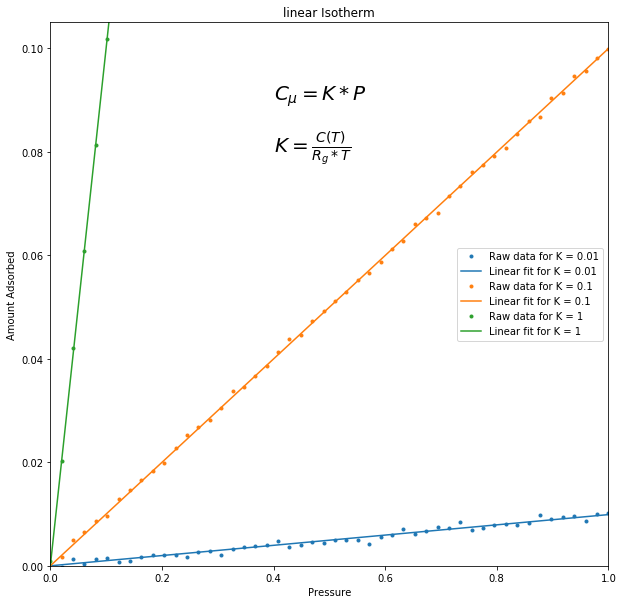

In [75]:
pressure = np.linspace(0, 1, 50)
np.random.seed(1729)

linear = plt.figure(figsize=(10,10))
for K in [0.01, 0.1, 1]:
    adsorbed = []*len(pressure)
    ads_calc = linear_fit(pressure, K)
    ads_noise = 0.0005 * np.random.normal(size=xdata.size)
    adsorbed = ads_calc + ads_noise
    raw = plt.plot(pressure, adsorbed, '.', 
                   label='Raw data for K = '+str(K))
    raw_color = raw[0].get_color()
    popt, pcov = curve_fit(linear_fit, pressure, adsorbed)
    fit = plt.plot(pressure, linear_fit(pressure, *popt), color=raw_color,
                   label ='Linear fit for K = '+str(K))

plt.title('linear Isotherm')
plt.xlabel('Pressure')
plt.ylabel('Amount Adsorbed')
plt.legend()
plt.axis((0, 1, 0, 0.105))
plt.text(.4, 0.09, r'$C_ {\mu} = K * P}$', 
        fontsize = 20)
plt.text(.4, 0.08, r'$K = \frac{C(T)}{R_g * T}$', 
        fontsize = 20)
plt.show()
linear.savefig('linear.jpg',dpi=500)